# Evaluación 1

**Integrantes:**

+ Integrante 1: Juan Diego Arévalo Durán : juan.arevalo2101@alumnos.ubiobio.cl
+ Integrante 2: Matías Rodrigo Muñoz Silva  : matias.munoz2201@alumnos.ubiobio.cl
+ Integrante 2: Matías Ignacio Vilches Bravo : matias.vilches2201@alumnos.ubiobio.cl

**Fecha de Entrega:** Abril 2025  
**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 1 de la asignatura de Inteligencia Artificial de la carrera Ingeniería Civil en Informática de la Universidad del Biío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- Pandas (2.2.2)
- Numpy (2.0.2)
- Matplotlib (3.10.0)
- Seaborn (0.13.2)



Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import numpy
print(numpy.__version__)
````

# Conjunto de datos y descripción

In [1]:
import pandas as pd
print(pd.__version__)
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
import seaborn as sns
print(sns.__version__)

2.2.2
2.0.2
3.10.0
0.13.2


In [ ]:
!python -m wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/student_performance.csv

--2025-04-08 00:14:56--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/student_performance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172546 (169K) [text/plain]
Saving to: ‘student_performance.csv’

student_performance 100%[===================>] 168.50K  --.-KB/s    in 0.03s   

2025-04-08 00:14:57 (5.89 MB/s) - ‘student_performance.csv’ saved [172546/172546]



<table>
  <tr>
    <th>Columna</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>Student_ID</td>
    <td>Identificador único del estudiante</td>
  </tr>
  <tr>
    <td>Hours_Studied</td>
    <td>Horas de estudio semanales</td>
  </tr>
  <tr>
    <td>Attendance_Rate</td>
    <td>Porcentaje de asistencia</td>
  </tr>
  <tr>
    <td>Assignments_Completed</td>
    <td>Núnero de tareas completadas</td>
  </tr>  
  <tr>
    <td>Midterm_Score</td>
    <td>Calificación del examen parcial (0-100)</td>
  </tr>
  <tr>
    <td>Final_Score</td>
    <td>Calificación del examen final (0-100)</td>
  </tr>
  <tr>
    <td>Project_Score</td>
    <td>Puntuación del proyecto final (0-100)</td>
  </tr>
  <tr>
    <td>Participation_Score</td>
    <td>Puntos por participación en clases(0-10)</td>
  </tr>
  <tr>
    <td>Study_Method</td>
    <td>Descripción del método de estudio (Kinesthetic, Visual, Auditory, Reading/ritting)</td>
  </tr>
</table>





---




In [3]:
data_frame = pd.read_csv("student_performance.csv")
data_frame

,Student_ID,Hours_Studied,Attendance_Rate,Assignments_Completed,Midterm_Score,Final_Score,Project_Score,Participation_Score,Study_Method
0,1,2,58,10,21,53,24,0,Kinesthetic
1,2,28,51,4,35,1,100,1,Visual
2,3,34,59,10,19,84,68,9,Auditory
3,4,38,62,2,27,24,66,5,Reading/Writing
4,5,17,83,3,67,100,28,8,Kinesthetic
...,...,...,...,...,...,...,...,...,...
4995,4996,15,69,2,37,67,96,10,Kinesthetic
4996,4997,16,89,1,2,96,45,1,Reading/Writing
4997,4998,34,76,1,9,85,74,7,Visual
4998,4999,1,91,2,1,94,57,6,Kinesthetic


# Cantidad de observaciones y características

In [ ]:
data_frame.shape

(5000, 9)

---
✅ **Interpretación**

---

+ Existen 5000 estudiantes
+ Cada estudiante tiene 9 características ()

#Detección de nulos

In [ ]:
pd.DataFrame(data_frame.isnull().sum(), columns=["Cantidad de nulos"]).T

,Student_ID,Hours_Studied,Attendance_Rate,Assignments_Completed,Midterm_Score,Final_Score,Project_Score,Participation_Score,Study_Method
Cantidad de nulos,0,0,0,0,0,0,0,0,0


---
✅ **Interpretación**

---

+ No se presenta ningún nulo en el dataframe

#Detección de atípicos

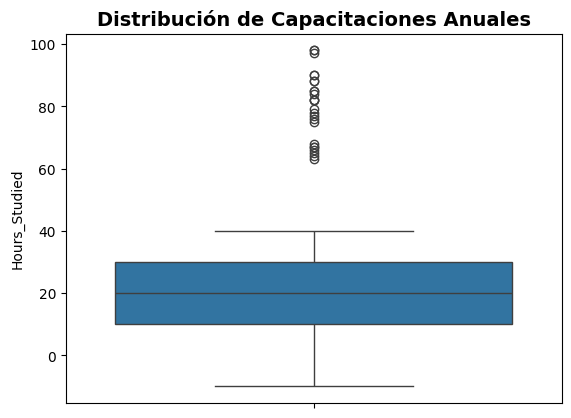

In [ ]:
sns.boxplot(y='Hours_Studied', data=data_frame)
plt.title("Distribución de Hora de estudios", fontsize=14, fontweight="bold")
plt.show()

---
✅ **Interpretación**

---

+ Se detecta la presencia de atípicos que se reconocen como los valores que se encuentran por sobre el límite superior.

# Estadística descriptiva

## Variable continua

Deberá incluir el cálculo e interpretación de las siguientes medidas estadísticas:
+ Medidas de posición (primer, segundo y tercer cuartil)
+ Desviación estándar
+ Mediana agrupada
+ Promedio


In [4]:
data_frame['Hours_Studied'].describe()

,Hours_Studied
count,5000.000000
mean,20.243400
std,12.609931
min,-10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,98.000000


---
✅ **Interpretación**

---

+ Escriba acá sus interpretaciones


## Variable discreta

In [6]:
data_frame['Assignments_Completed'].describe()

,Assignments_Completed
count,5000.000000
mean,5.002400
std,3.188546
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

# Análisis de frecuencia de método de estudio

ValueError: 'explode' must be of length 'x', not 2

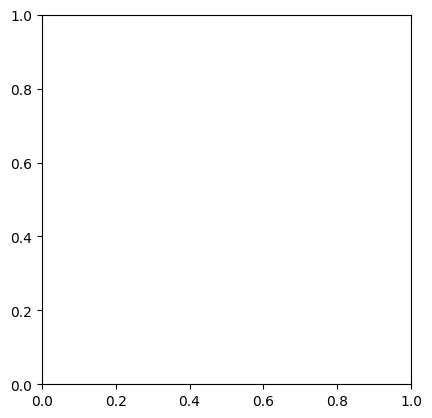

In [10]:
tipos = data_frame['Study_Method'].unique()
total = data_frame['Study_Method'].value_counts().tolist()
explode = [0.4 if total[0] == max(total) else 0, 0.4 if total[1] == max(total) else 0]
plt.pie(total, labels=tipos, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Metodos de estudio', fontsize=18, fontweight="bold")
plt.show()

# Análisis de simetría/asimetría

## Variable elegida por el equipo que será analizada

In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

# Visualizaciones

## Distribución de una variable continua

In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

## Distribucion de una variable discreta

In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

# Insight

## Insight 1 – Participación y rendimiento

¿Los estudiantes con mayor participación (Participation_Score) tienen mejores Final_Score?



In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

##Insight 2 – Método de estudio más efectivo

¿Cuál Study_Method está asociado con mayor promedio de Final_Score?



In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---


+ Escriba acá sus interpretaciones

##Insight 3 – Correlación horas de estudio vs. score final

¿Qué tan fuerte es la correlación entre Hours_Studied y Final_Score?



In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---

+ Escriba acá sus interpretaciones

##Insight 4 – Identificación de valores atípicos extremos

¿Cuántos estudiantes tienen valores de Attendance_Rate fuera del rango [50, 100]? ¿Cómo se comportan sus otras métricas?

In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---

+ Escriba acá sus interpretaciones

##Insight propuesto por el equipo

Redacte acá el insight propuesto por el equipo

In [ ]:
# Escriba acá su código

---
✅ **Interpretación**

---

+ Escriba acá sus interpretaciones